In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
feature_df=pd.read_csv(r'C:\Users\ayish\GuviProjects\Final Project\Features_data_set (1).csv',parse_dates=['Date'])
store_df=pd.read_csv(r'C:\Users\ayish\GuviProjects\Final Project\stores_data_set.csv')
sales_df=pd.read_csv(r'C:\Users\ayish\GuviProjects\Final Project\sales_data_set (1).csv',parse_dates=['Date'])

In [23]:
feature_df['Date']=pd.to_datetime(feature_df['Date'],dayfirst=True,format='mixed')

feature_df['Day']=feature_df['Date'].dt.day
feature_df['month']=feature_df['Date'].dt.month
feature_df['year']=feature_df['Date'].dt.year


In [24]:
sales_df['Date']=pd.to_datetime(sales_df['Date'],dayfirst=True,format='mixed')

sales_df['Day']=sales_df['Date'].dt.day
sales_df['month']=sales_df['Date'].dt.month
sales_df['year']=sales_df['Date'].dt.year

In [66]:
sales_df['Day'].min()

1

In [34]:
data_date=feature_df.groupby('Date').agg({'Temperature':'mean',
                                          'Fuel_Price':'mean',
                                          'IsHoliday':'sum',
                                          'CPI':'mean',
                                          'Unemployment':'mean'
                                        })

data_date=data_date.sort_index()
#temp_date_data=data_date[:'2012-12-10']

data_sales_date=  sales_df.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date,data_date, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )
#data.dropna(inplace=True)
#data=data.sort_values(by=['Date'])

In [35]:
data

,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
2010-02-05,49,34.037333,2.717844,False,167.730885,8.619311
2010-02-12,48,34.151333,2.694022,True,167.825608,8.619311
2010-02-19,48,37.719778,2.672067,False,167.871686,8.619311
2010-02-26,43,39.243556,2.683933,False,167.909657,8.619311
2010-03-05,46,42.917333,2.731200,False,167.947628,8.619311
...,...,...,...,...,...,...
2012-09-28,43,68.754444,3.854578,False,176.373588,7.237333
2012-10-05,47,65.973111,3.845222,False,176.505052,6.953711
2012-10-12,46,58.342667,3.896733,False,176.636515,6.953711


In [36]:
data

,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
Date,,,,,,
2010-02-05,49,34.037333,2.717844,False,167.730885,8.619311
2010-02-12,48,34.151333,2.694022,True,167.825608,8.619311
2010-02-19,48,37.719778,2.672067,False,167.871686,8.619311
2010-02-26,43,39.243556,2.683933,False,167.909657,8.619311
2010-03-05,46,42.917333,2.731200,False,167.947628,8.619311
...,...,...,...,...,...,...
2012-09-28,43,68.754444,3.854578,False,176.373588,7.237333
2012-10-05,47,65.973111,3.845222,False,176.505052,6.953711
2012-10-12,46,58.342667,3.896733,False,176.636515,6.953711


In [37]:
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,46.601399,60.663782,3.358607,171.578394,7.999151
std,5.399713,15.172792,0.429401,3.100148,0.483853
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,47.000000,74.697333,3.726133,174.724576,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

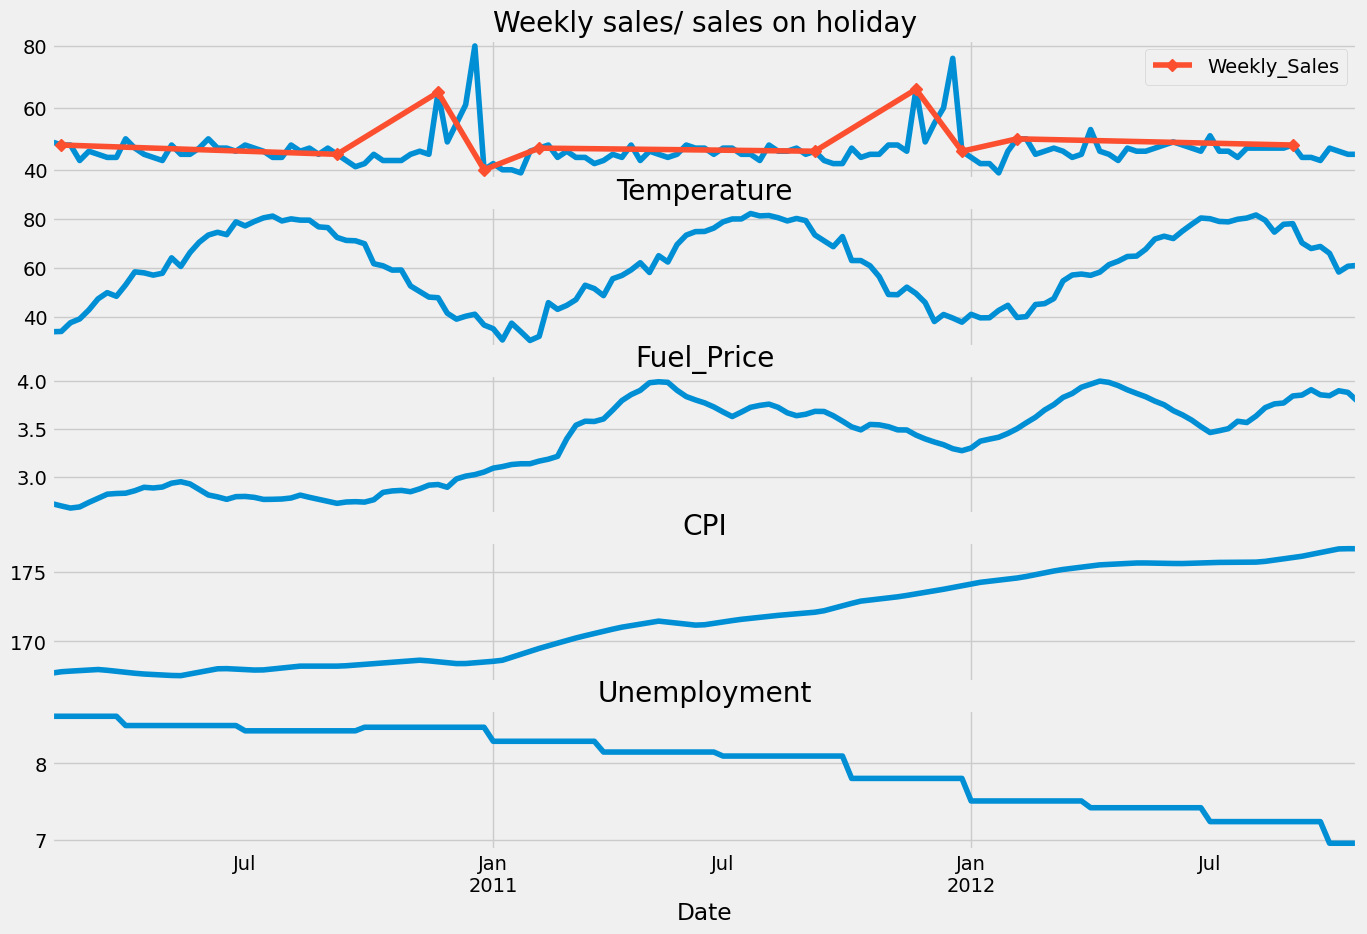

In [44]:
plt.style.use('fivethirtyeight')
fig, ax=plt.subplots(5,1, figsize=(15,10),sharex=True)
data['Weekly_Sales'].plot(ax=ax[0], title="Weekly sales/ sales on holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

<Axes: >

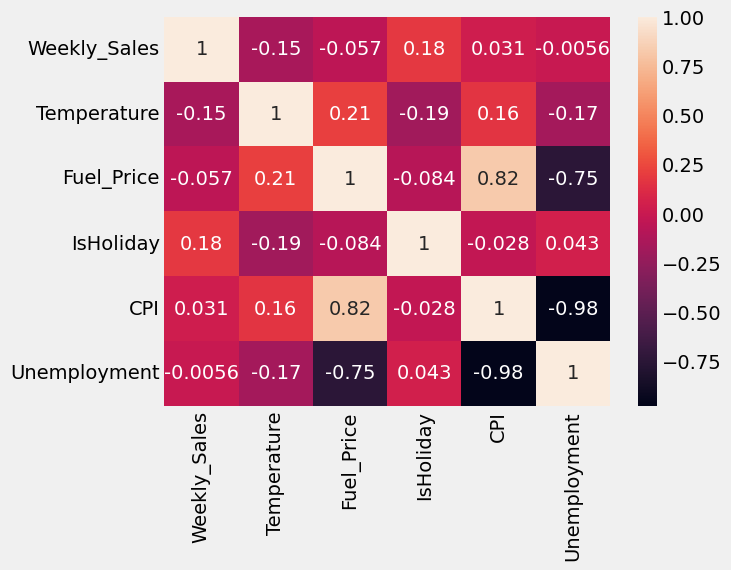

In [39]:
sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Sales')

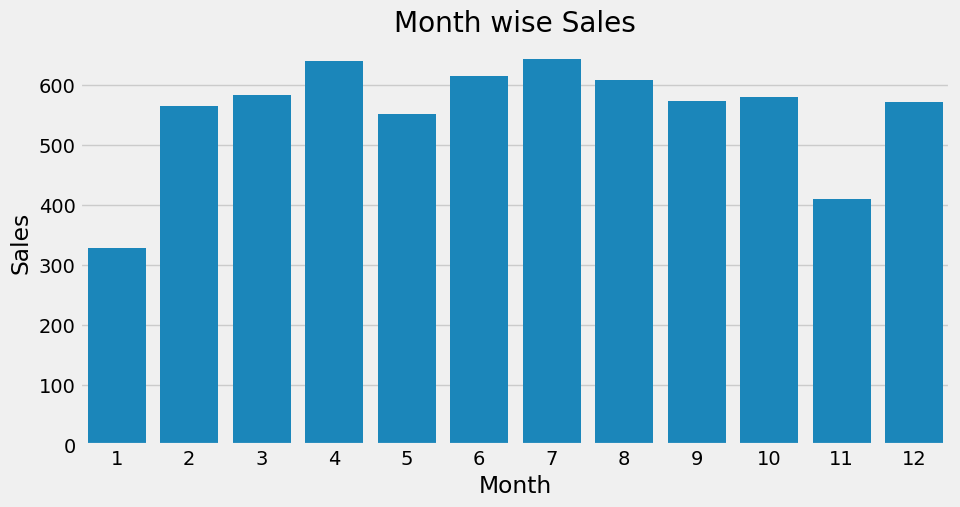

In [40]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

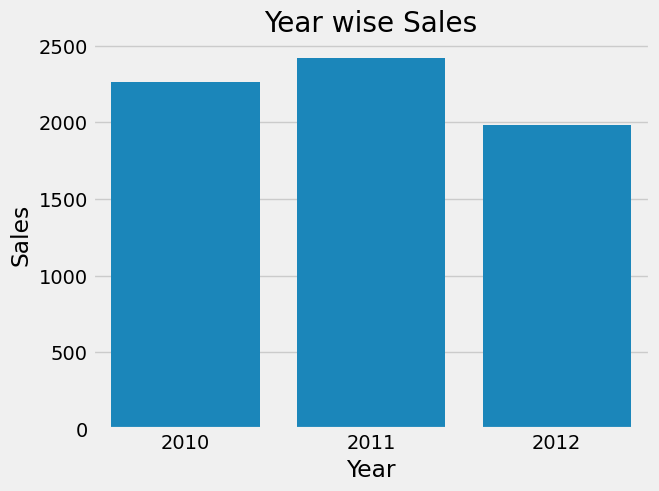

In [41]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)

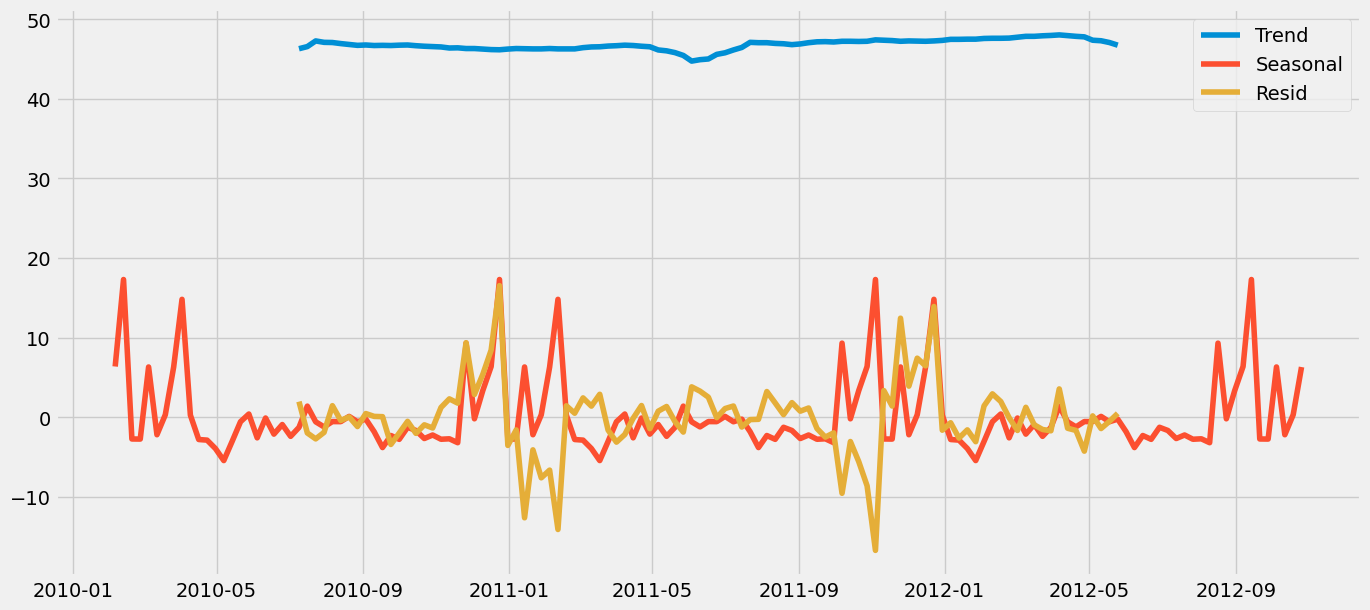

In [43]:
plt.figure(figsize=(15, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right") 

In [46]:
data_Store = feature_df.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

temp_store = sales_df.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
store_df["temp"] = data_Store.Temperature
store_df["Fuel_Price"] = data_Store.Fuel_Price
store_df["holiday"] = data_Store.IsHoliday
store_df["Weekly_Sales"] = temp_store.Weekly_Sales

<Axes: xlabel='Type', ylabel='Weekly_Sales'>

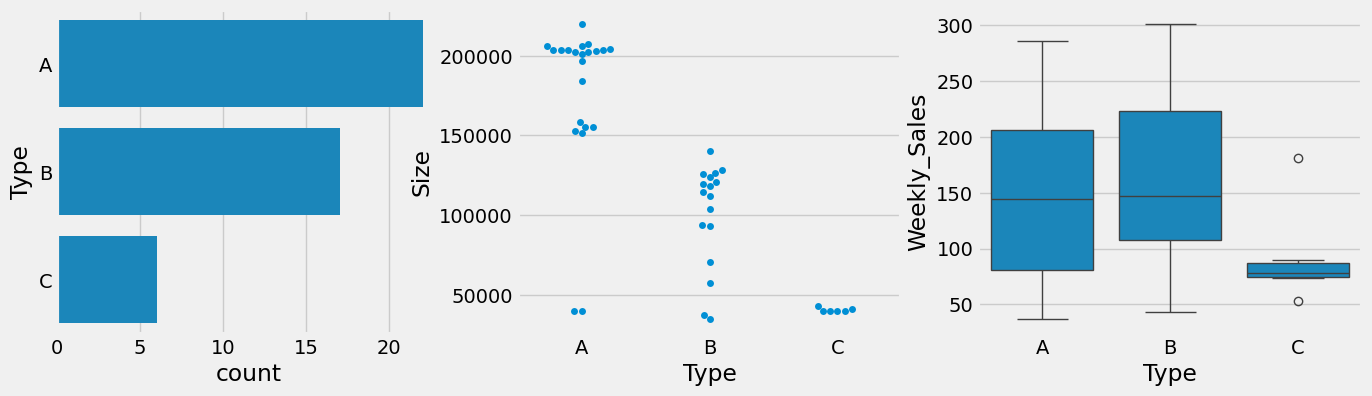

In [47]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(store_df.Type,ax=ax[0])
sns.swarmplot(data = store_df,y="Size",x="Type",ax=ax[1])

sns.boxplot(data = store_df,y="Weekly_Sales",x="Type",ax=ax[2])

In [48]:
len(sales_df["Dept"].unique())

81

In [49]:
data_Dept = sales_df.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


Text(0.5, 0, 'Department')

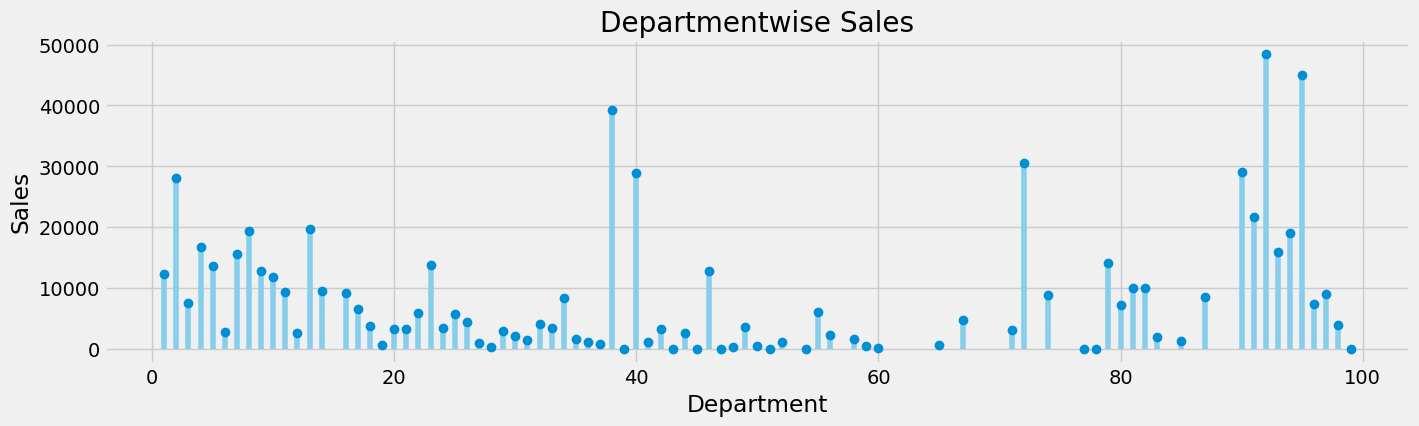

In [50]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

In [51]:
sales_date_store = sales_df.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(feature_df,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,store_df[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

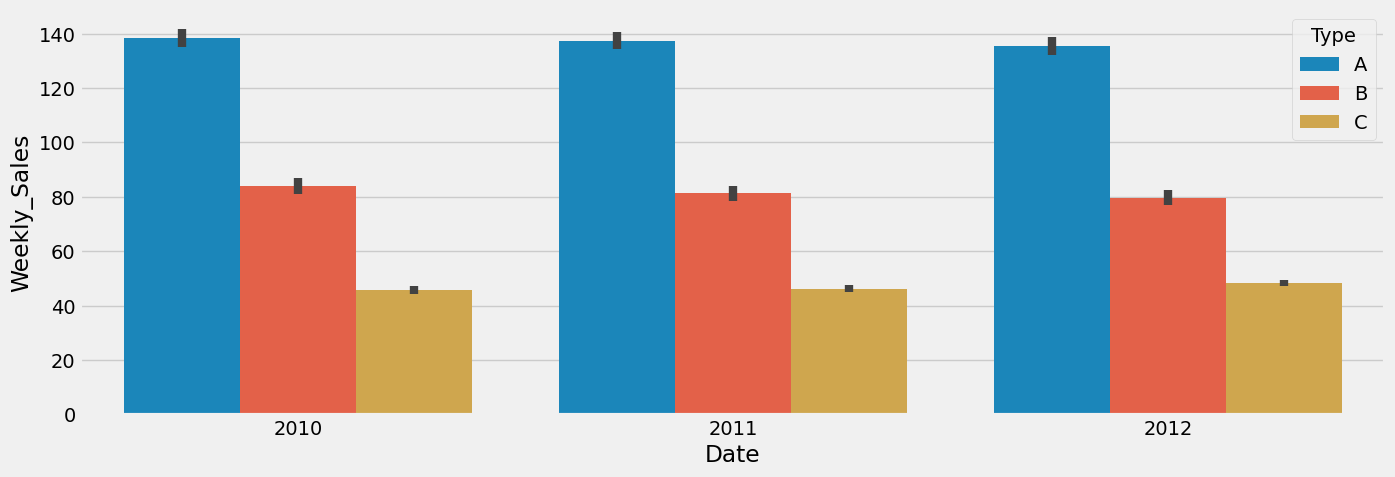

In [52]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

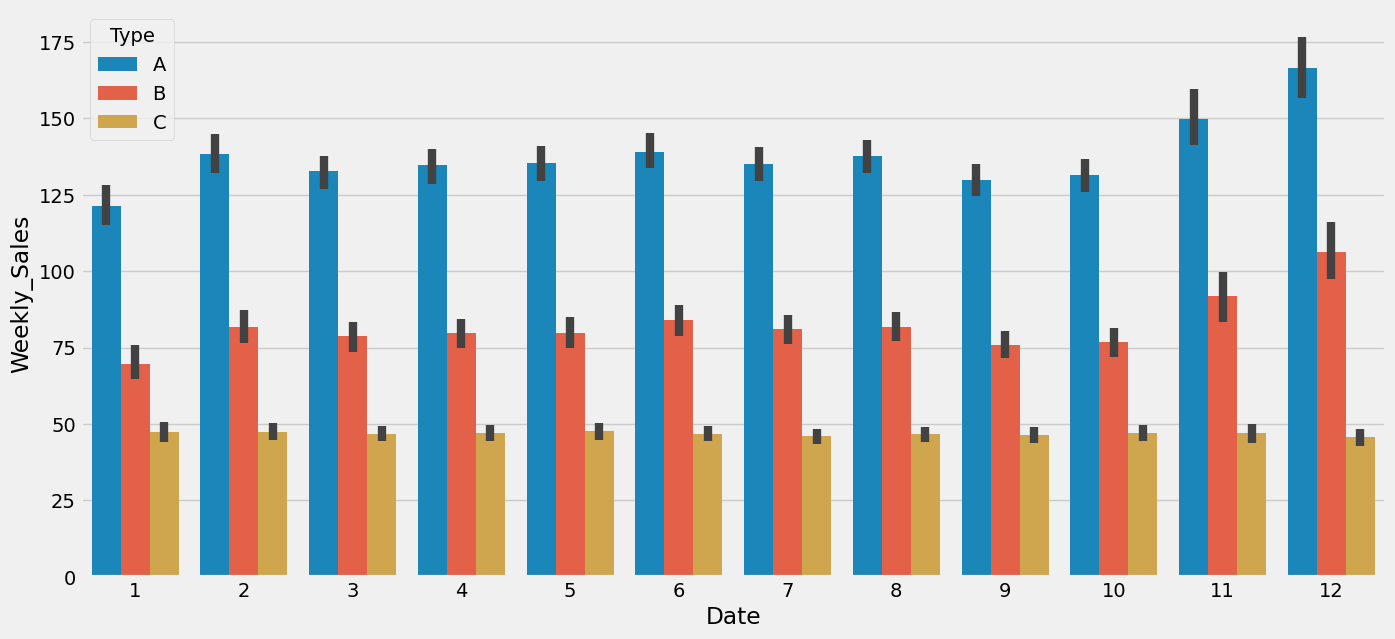

In [53]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

Text(0.5, 0, 'Date')

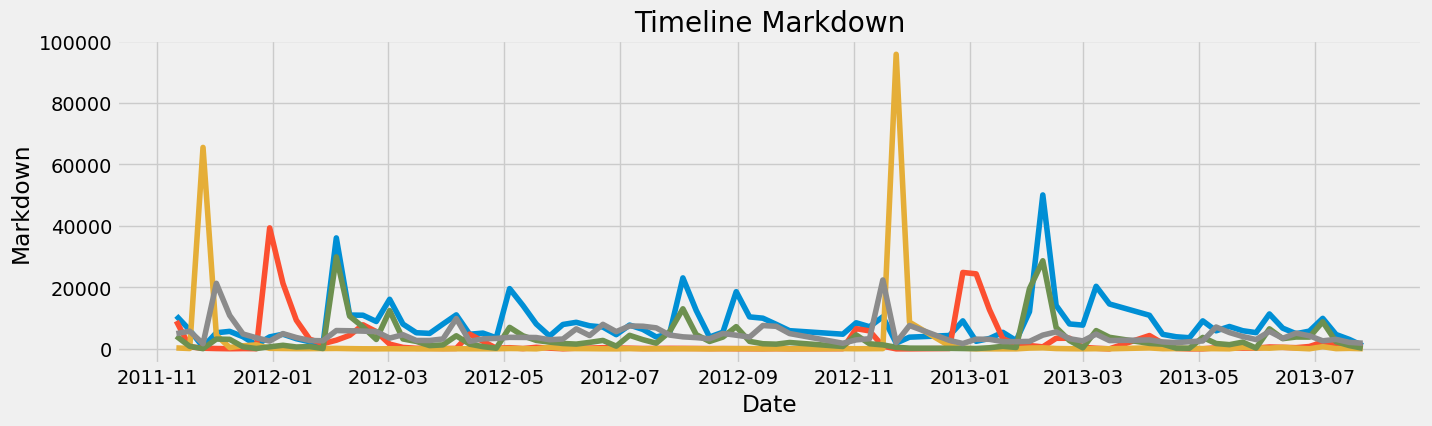

In [54]:
plt.figure(figsize=(15,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

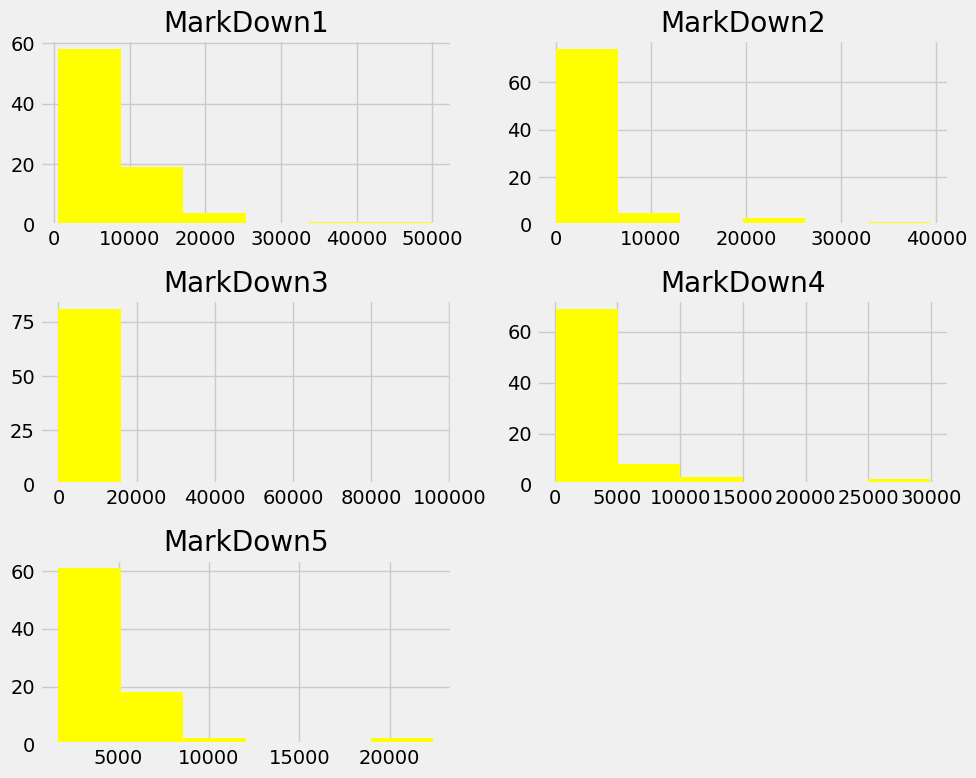

In [56]:
train_markdown.hist(figsize=(10,8),bins=6,color='yellow')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Markdown')

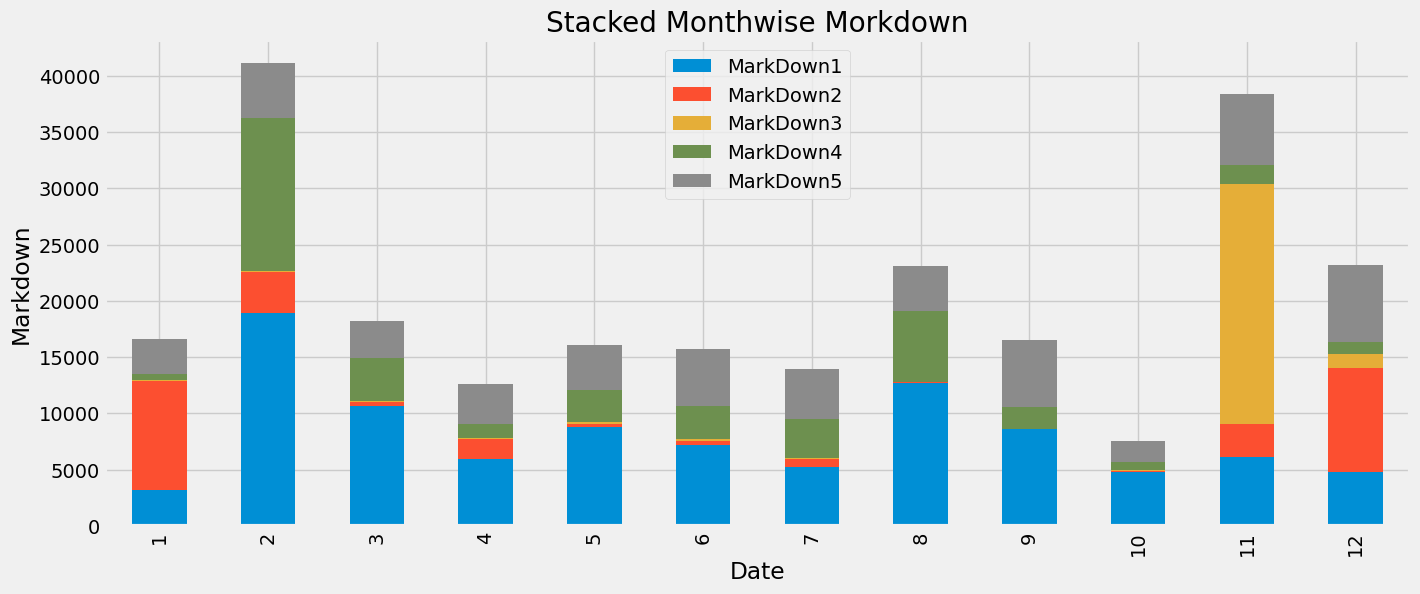

In [57]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Morkdown")
plt.ylabel("Markdown")

Text(0, 0.5, 'Markdown')

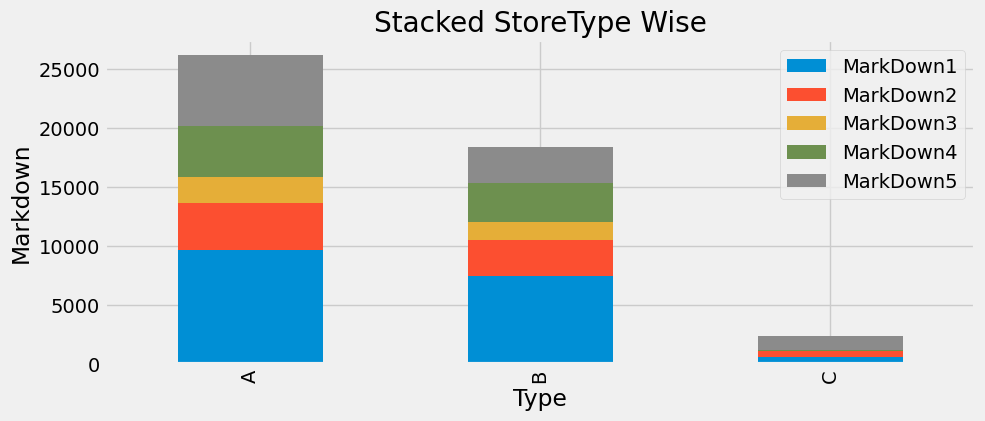

In [58]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")